In [1]:
import numpy as np
import OmniFold.omnifold as of
import OmniFold.ibu as ibu

import energyflow as ef

In [2]:
import matplotlib.pyplot as plt
import OmniFold.modplot as modplot
import OmniFold.ibu as ibu

plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'

In [9]:
fi = np.load("/data1/users/wmccorma/10PercSig_4MeV_Omni_synthsig_not125_corrData.npz")

In [10]:
ws = np.load("/data0/users/wmccorma/Feb_2021_not125_Omni_allBSM/Official_Omni_synthsig_10Perc_perc_4_mass_not125_corrData.npy")

In [11]:
print(ws[20])

[0.86383171 0.39720181 0.02271583 ... 0.67429676 0.72719574 0.74632905]


In [12]:
X_detT = fi['X_detT_glob']
X_det = fi['X_det_glob']
X_gen = fi['X_gen_glob']

print(len(X_detT))
print(len(X_gen))
print(X_detT.shape)
print(X_gen.shape)

520000
640000
(520000, 3)
(640000, 3)


In [13]:
def tri(xlim, numbins, h1, h2):
    binsize = (float(xlim[1])-float(xlim[0]))/float(numbins)
    #print(binsize)
    integral = 0.
    for i in range(len(h1)):
        if((h1[i] + h2[i]) > 0.):
            integral += (h1[i] - h2[i])*(h1[i] - h2[i])/(h1[i] + h2[i])
    return integral

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


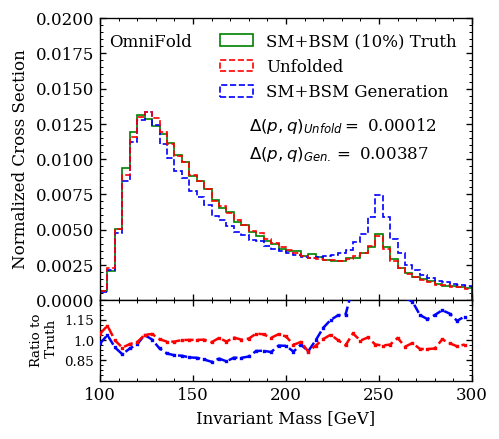

In [14]:
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 1., 'zorder': 3}

itn = 10

#'xlabel': r'Jet Mass $m$ [GeV]', 'symbol': r'$m$',
#'ylabel': r'Normalized Cross Section [GeV$^{-1}$]',

fig, [ax0, ax1] = modplot.axes(xlabel = 'Invariant Mass [GeV]', ylabel = 'Normalized Cross Section', xlim = (100, 300))
ax0.set_ylim([0, .02])
ax1.set_ylim([0.7, 1.3])
ax1.set_ylabel('Ratio to\n Truth')

rnge = [100,300]

#h4 = ax0.hist(X_det[:200000,0], bins=50, color='black', label='SM+BSM (10%) \"Data\"', range = rnge, **hist_style)[0]

h1 = ax0.hist(X_detT[:200000,0], bins=50, color='green', label='SM+BSM (10%) Truth', range = rnge, **hist_style)[0]
#h1 = ax0.hist(X_detT[:200000,0], bins=50, color='green', label='SM-only Truth', range = rnge, **hist_style)[0]
h2 = ax0.hist(X_gen[:320000,0], bins=50, color='blue', linestyle = 'dashed', label='SM+BSM Generation', range = rnge, **hist_style)[0]
h3 = ax0.hist(X_gen[:320000,0], weights = ws[itn][:320000]*320000./np.sum(ws[itn]), bins=50, range = rnge, color='red', linestyle = 'dashed', label='Unfolded', **hist_style)[0]
#h4 = ax0.hist(X_gen[:260000,0], weights = ws2[:]*260000./np.sum(ws2[:]), bins=50, range = rnge, color='orange', label='\"Perfect weights\"', **hist_style)[0]


ratio1 = h2/( h1 + 10**-50)
ratio2 = h3/( h1 + 10**-50)
#ratio3 = h4/( h1 + 10**-50)

xbins = []
for i in range(50):
    xbins.append(100+i*4)

ax1.plot(xbins, ratio1, color='blue', linestyle = 'dashed', label='``SM\"', **omnifold_style)
ax1.plot(xbins, ratio2, color='red', linestyle = 'dashed', label='``SM\"', **omnifold_style)
#ax1.plot(xbins, ratio3, color='orange', label='``SM\"', **omnifold_style)

loc = 'upper right'
ncol = 1
#order = [3, 1, 2, 0] if ncol==2 else [0, 2, 1, 3]
order = [2, 0, 1] if ncol==2 else [0, 2, 1]
modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

ax0.text(105, .018, 'OmniFold')
#ax0.text(105, .016, '$m_{a} = 16$ GeV')
ax0.text(180, .012, '$\Delta (p,q)_{Unfold} = $ %.5f' %(tri((100,300), 50, h1, h3)))
ax0.text(180, .01, '$\Delta (p,q)_{Gen.} = $ %.5f' %(tri((100,300), 50, h1, h2)))

#plt.show()
plt.savefig('Higgs250_OmniFold_TruthLevel_BSMGen.pdf', bbox_inches = "tight")